**Permasalahan :**

Yang menjadi permasalahan adalah jika anda ingin memahami pelanggan dalam Mall tersebut dan bagaimana menemukan target pelanggan yang tepat sehingga hasil analisa dapat diberikan kepada tim pemasaran dan merencanakan strategi yang sesuai.

**Inspirasi :**

Pada akhir studi kasus ini, Anda akan dapat menjawab pertanyaan di bawah ini.

- Cara mencapai segmentasi pelanggan menggunakan algoritma Machin Learning (KMeans Clustering)
- Siapa target pelanggan Anda dengan siapa Anda dapat memulai strategi pemasaran [mudah untuk berkomunikasi] ?
- Bagaimana strategi pemasaran bekerja di dunia nyata?

In [979]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import plotly.express as px

In [980]:
mall = pd.read_csv('C:/UNISKA/semester 3/python data science - data mining/dataset/Pengunjung_Mall.csv')
mall

,ID_Pelanggan,Gender,Usia,Pendapatan_Tahunan_Ribuan_USD,Pengeluaran_USD
0,1,Pria,19,15,39
1,2,Pria,21,15,81
2,3,Wanita,20,16,6
3,4,Wanita,23,16,77
4,5,Wanita,31,17,40
...,...,...,...,...,...
195,196,Wanita,35,120,79
196,197,Wanita,45,126,28
197,198,Pria,32,126,74
198,199,Pria,32,137,18


In [981]:
mall.nunique()

ID_Pelanggan                     200
Gender                             2
Usia                              51
Pendapatan_Tahunan_Ribuan_USD     64
Pengeluaran_USD                   84
dtype: int64

In [982]:
mall.duplicated().sum()

0

In [983]:
mall.isna().sum()

ID_Pelanggan                     0
Gender                           0
Usia                             0
Pendapatan_Tahunan_Ribuan_USD    0
Pengeluaran_USD                  0
dtype: int64

In [984]:
mall[['Usia', 'Pendapatan_Tahunan_Ribuan_USD', 'Pengeluaran_USD']].describe()

,Usia,Pendapatan_Tahunan_Ribuan_USD,Pengeluaran_USD
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [985]:
mall.shape

(200, 5)

# Data Outliers

cek data outliers

ID_Pelanggan                        Axes(0.125,0.653529;0.0945122x0.226471)
Usia                             Axes(0.238415,0.653529;0.0945122x0.226471)
Pendapatan_Tahunan_Ribuan_USD    Axes(0.351829,0.653529;0.0945122x0.226471)
Pengeluaran_USD                  Axes(0.465244,0.653529;0.0945122x0.226471)
dtype: object

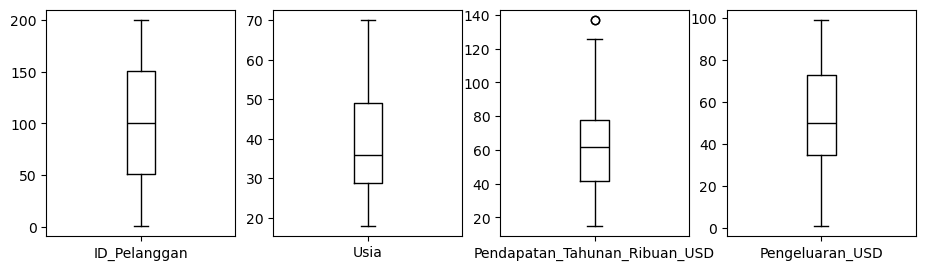

In [986]:
mall.plot(kind= 'box', subplots=True, layout=(3, 7), sharex=False, sharey=False, figsize=(20, 10), color='k')

dari sini terlihat ada data outlier pada data pendapatan tahunan, akan tetapi saya akan membiarkannya, karena disini konteksnya adalah menentukan target pelanggan

In [987]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   ID_Pelanggan                   200 non-null    int64 
 1   Gender                         200 non-null    object
 2   Usia                           200 non-null    int64 
 3   Pendapatan_Tahunan_Ribuan_USD  200 non-null    int64 
 4   Pengeluaran_USD                200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Text(38, 5, '<-- Mean')

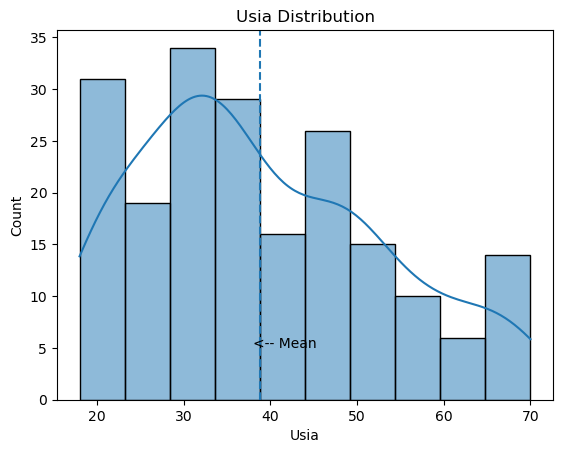

In [988]:
sns.histplot(mall['Usia'], kde=True, bins=10) # kde untuk membuat garis kurva yang menunjukkan distribusi data, bins=10 untuk membagi data menjadi 10 kelompok interval
plt.title('Usia Distribution')
plt.axvline(mall['Usia'].mean(), ls='--') # menambahkan garis vertikal putus-putus pada nilai mean(rata-rata)
plt.text(38, 5, '<-- Mean')

Mayoritas pengunjung mall berusia antara 20-40 tahun, frekuensi pengunjung berkurang setelah usia 50 tahun, pengunjung diatas umur 60 relatif sedikit

C:\Users\HP\AppData\Local\Temp\ipykernel_720\1481521354.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=mall, x='Gender', order= mall['Gender'].value_counts().index, palette='husl')


<Axes: xlabel='Gender', ylabel='count'>

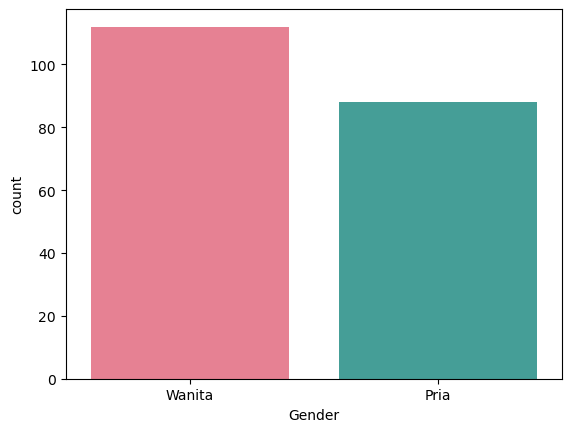

In [989]:
sns.countplot(data=mall, x='Gender', order= mall['Gender'].value_counts().index, palette='husl')

In [990]:
le = LabelEncoder()

mall['Gender'] = le.fit_transform(mall['Gender'])
mall

,ID_Pelanggan,Gender,Usia,Pendapatan_Tahunan_Ribuan_USD,Pengeluaran_USD
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


In [991]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   ID_Pelanggan                   200 non-null    int64
 1   Gender                         200 non-null    int32
 2   Usia                           200 non-null    int64
 3   Pendapatan_Tahunan_Ribuan_USD  200 non-null    int64
 4   Pengeluaran_USD                200 non-null    int64
dtypes: int32(1), int64(4)
memory usage: 7.2 KB


# Data Analysis

<Axes: xlabel='Pengeluaran_USD', ylabel='Pendapatan_Tahunan_Ribuan_USD'>

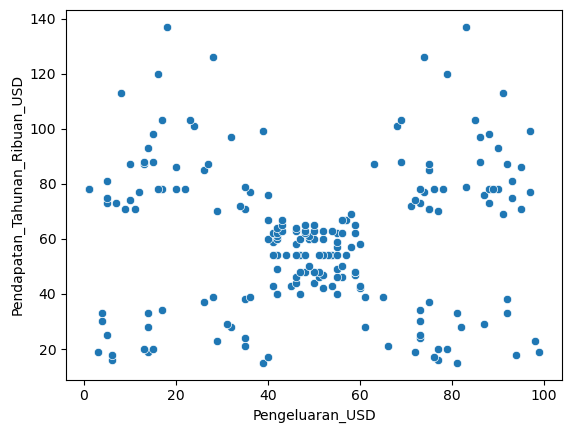

In [992]:
sns.scatterplot(x='Pengeluaran_USD', y='Pendapatan_Tahunan_Ribuan_USD', data=mall)

dari hasil visualisasi plot diatas membuktikan bahwa yang memiliki pendapatan tahunan lebih tinggi belum tentu mengeluarkan pengeluaran yang tinggi juga, ada beberapa pengunjung yang memiliki pendapatan yang tinggi namun berpengeluaran rendah, sebaliknya ada banyak juga pengunjung yang memiliki pendapatan rendah namun pengeluarannya tinggi

In [993]:
mall[['Pengeluaran_USD', 'Pendapatan_Tahunan_Ribuan_USD']].corr()

,Pengeluaran_USD,Pendapatan_Tahunan_Ribuan_USD
Pengeluaran_USD,1.000000,0.009903
Pendapatan_Tahunan_Ribuan_USD,0.009903,1.000000


berdasarkan hasil ini menunjukkan bahwa pengeluaran dan pendapatan tahunan memiliki korelasi/hubungan akan tetapi sangat lemah, hal itu juga diperkuat oleh hasil scatterplot tadi yang menunjukkan hasilnya, akan tetapi tidak menutup kemungkinan bahwa pendapatan menjadi salah satu faktor pengaruh pada pengeluaran, namun relatif sangat lemah mengingat korelasinya sangat lemah.

Text(0, 0.5, 'Pengeluaran_USD')

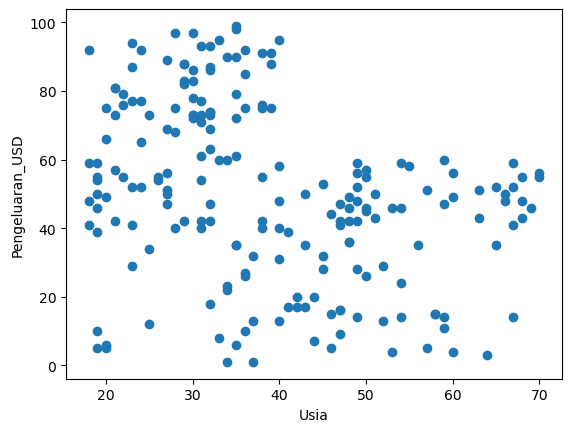

In [994]:
plt.scatter(x='Usia', y='Pengeluaran_USD', data=mall)
plt.xlabel('Usia')
plt.ylabel('Pengeluaran_USD')

dari hasil ini terlihat bahwa diusia produktif antara 20-40 tahun cenderung memiliki pengeluaran yang lebih tinggi dibandingkan dengan usia diatas 40 tahun yang cenderung rendah

In [995]:
mall[['Usia', 'Pengeluaran_USD']].corr()

,Usia,Pengeluaran_USD
Usia,1.000000,-0.327227
Pengeluaran_USD,-0.327227,1.000000


korelasi ini menunjukkan adanya hubungan terbalik antara usia dengan pengeluaran, hal ini menunjukkan bahwa semakin tinggi usianya cenderung lebih rendah pengeluarannya, namun korelasi ini tidak terlalu kuat karena hanya -0.327 dari -1

wawasan :

- ada tren bahwa orang yang lebih muda cenderung memiliki pengeluaran yang tinggi dibandingkan orang yang lebih tua
- Namun, hubungan ini tidak terlalu kuat, yang menunjukkan ada faktor lain yang mempengaruhi pengeluaran
- sebaran data yang cukup luas menunjukkan variasi pengunjung mall yang tinggi dalam pola pengeluaran pada setiap kelompok usia.

# Machine Learning

# Unsupervised Model Training With Clustering

In [996]:
from sklearn.cluster import KMeans

Pengeluaran Pelanggan berdasarkan prefrensi

In [997]:
features = ['Usia', 'Pendapatan_Tahunan_Ribuan_USD', 'Pengeluaran_USD']
features

['Usia', 'Pendapatan_Tahunan_Ribuan_USD', 'Pengeluaran_USD']

Scaling data

In [998]:
scaler = StandardScaler()
scaled = scaler.fit_transform(mall[features])

cari cluster yang optimal menggunakan metode elbow

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

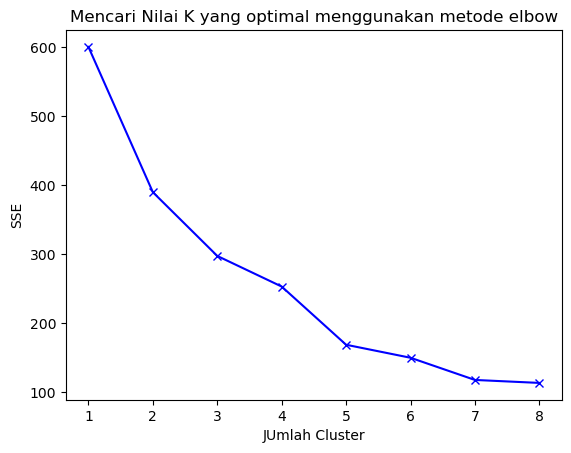

In [999]:
sse = []
clusters = range(1, 9)
for n_clusters in clusters:
    km = KMeans(n_clusters=n_clusters, random_state=0)
    km.fit(scaled)
    sse.append(km.inertia_)
    
plt.plot(clusters, sse, 'bx-')
plt.xlabel('JUmlah Cluster')
plt.ylabel('SSE')
plt.title('Mencari Nilai K yang optimal menggunakan metode elbow')
plt.show()

disini terlihat bahwa nilai k yang optimal adalah 3, maka kita akan membuat dengan 3 cluster

In [1000]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans

KMeans(n_clusters=3, random_state=0)

In [1001]:
labels = kmeans.fit_predict(scaled)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [1002]:
mall['cluster'] = labels
mall.shape

(200, 6)

In [1003]:
mall

,ID_Pelanggan,Gender,Usia,Pendapatan_Tahunan_Ribuan_USD,Pengeluaran_USD,cluster
0,1,0,19,15,39,2
1,2,0,21,15,81,2
2,3,1,20,16,6,0
3,4,1,23,16,77,2
4,5,1,31,17,40,0
...,...,...,...,...,...,...
195,196,1,35,120,79,2
196,197,1,45,126,28,1
197,198,0,32,126,74,2
198,199,0,32,137,18,1


In [1004]:
mall.groupby('cluster')[features].mean()

,Usia,Pendapatan_Tahunan_Ribuan_USD,Pengeluaran_USD
cluster,,,
0,52.608696,46.072464,39.333333
1,39.368421,86.500000,19.578947
2,28.430108,60.709677,70.774194


# **Bagaimana Pengaruh Usia terhadap Pengeluaran pengunjung mall?**

berdasarkan korelasinya, disini saya akan membuat scatter plot dengan menampilkan x = 'Usia' dan y = 'Pengeluaran_USD'
karena korelasinya memiliki nilai tertinggi walaupin berbanding balik yakni -0.327 (32.7%).

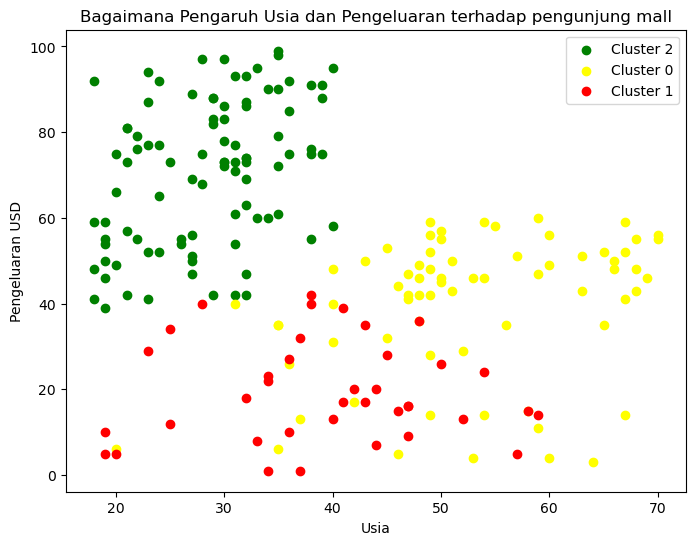

In [1005]:
unique_clusters = mall['cluster'].unique()

colors = ['green', 'yellow', 'red']

plt.figure(figsize=(8, 6))

for i, cluster_label in enumerate(unique_clusters):
    cluster_df = mall[mall['cluster'] == cluster_label]
    plt.scatter(cluster_df['Usia'], cluster_df['Pengeluaran_USD'], color=colors[i], label=f'Cluster {cluster_label}')
    
plt.xlabel('Usia')
plt.ylabel('Pengeluaran USD')
plt.legend()

plt.title('Bagaimana Pengaruh Usia dan Pengeluaran terhadap pengunjung mall')

plt.show()

- cluster 2 lebih dominan usia muda(20-40 tahun) dengan pengeluaran tinggi (60-100 usd). hal ini menunjukkan pola konsumtif yang tinggi pada usia produktif muda
- cluster 1 dominan usia tua (40-70 tahun) dengan pengeluaran menengah(30-60 usd). hal ini menunjukkan pola konsumsi yang moderat
- cluster 0 tersebar disemua rentang usia dengan pengeluaran rendah(0-40 usd).hal ini menunjukkan pola konsumsi yang konservatif

menampilkan data berdasarkan cluster

In [1006]:
select_cols = ['ID_Pelanggan', 'Gender', 'Usia', 'Pendapatan_Tahunan_Ribuan_USD','Pengeluaran_USD', 'cluster']

cluster 0

In [1007]:
# cluster 0
cluster0 = mall[select_cols].sort_values(by='Pengeluaran_USD', ascending=False)
cluster0 = cluster0[cluster0['cluster']==0]
cluster0.head(10)

,ID_Pelanggan,Gender,Usia,Pendapatan_Tahunan_Ribuan_USD,Pengeluaran_USD,cluster
53,54,0,59,43,60,0
117,118,1,49,65,59,0
63,64,1,54,47,59,0
102,103,0,67,62,59,0
86,87,1,55,57,58,0
119,120,1,50,67,57,0
60,61,0,70,46,56,0
73,74,1,60,50,56,0
104,105,0,49,62,56,0
90,91,1,68,59,55,0


In [1008]:
cluster0.mean()

ID_Pelanggan                     66.057971
Gender                            0.579710
Usia                             52.608696
Pendapatan_Tahunan_Ribuan_USD    46.072464
Pengeluaran_USD                  39.333333
cluster                           0.000000
dtype: float64

Text(53, 5, '<-- Mean')

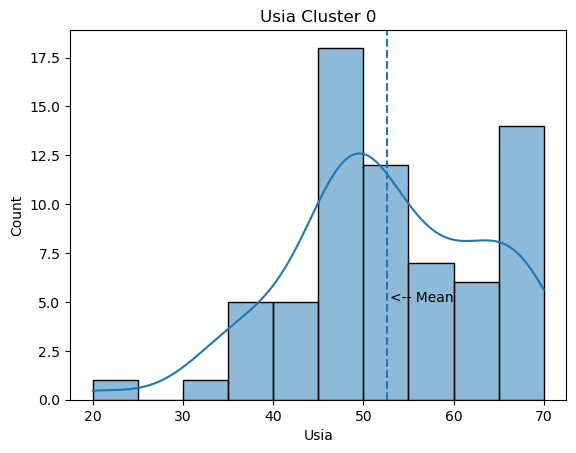

In [1009]:
# plot usia cluster 0
sns.histplot(cluster0['Usia'], kde=True, bins=10)
plt.title('Usia Cluster 0')
plt.axvline(cluster0['Usia'].mean(), ls='--')
plt.text(53, 5, '<-- Mean')

Text(39, 5, '<-- Mean')

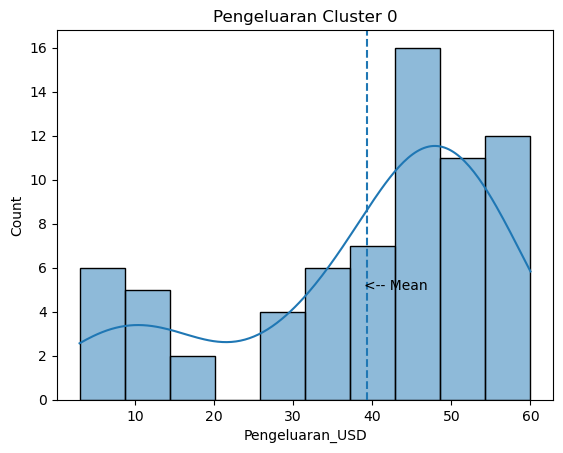

In [1010]:
# plot pengeluaran cluster 0
sns.histplot(cluster0['Pengeluaran_USD'], kde=True, bins=10)
plt.title('Pengeluaran Cluster 0')
plt.axvline(cluster0['Pengeluaran_USD'].mean(), ls='--')
plt.text(39, 5, '<-- Mean')

cluster 1

In [1011]:
# cluster 1
cluster1 = mall[select_cols].sort_values(by='Pengeluaran_USD', ascending=False)
cluster1 = cluster1[cluster1['cluster']==1]
cluster1.head(10)

,ID_Pelanggan,Gender,Usia,Pendapatan_Tahunan_Ribuan_USD,Pengeluaran_USD,cluster
112,113,1,38,64,42,1
142,143,1,28,76,40,1
121,122,1,38,67,40,1
184,185,1,41,99,39,1
146,147,0,48,77,36,1
126,127,0,43,71,35,1
132,133,1,25,72,34,1
180,181,1,37,97,32,1
124,125,1,23,70,29,1
196,197,1,45,126,28,1


In [1012]:
cluster1.mean()

ID_Pelanggan                     160.552632
Gender                             0.500000
Usia                              39.368421
Pendapatan_Tahunan_Ribuan_USD     86.500000
Pengeluaran_USD                   19.578947
cluster                            1.000000
dtype: float64

Text(39, 5, '<-- Mean')

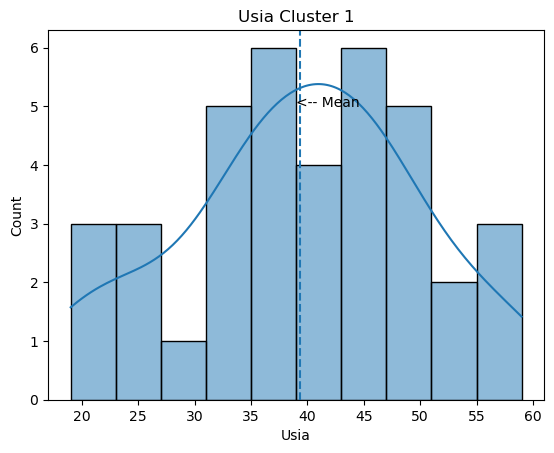

In [1013]:
# plot cluster 1
sns.histplot(cluster1['Usia'], kde=True, bins=10)
plt.title('Usia Cluster 1')
plt.axvline(cluster1['Usia'].mean(), ls='--')
plt.text(39, 5, '<-- Mean')

Text(20, 5, '<-- Mean')

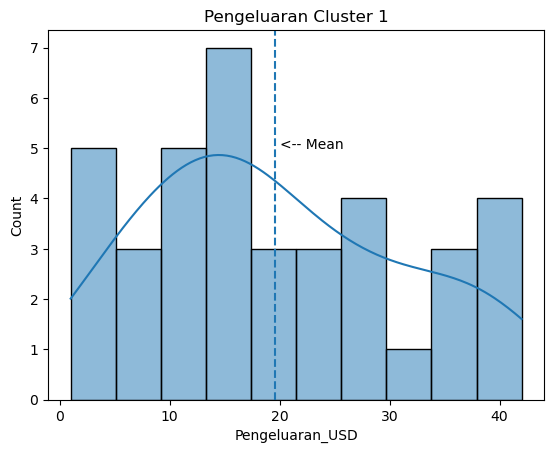

In [1014]:
# plot pengeluaran cluster 1
sns.histplot(cluster1['Pengeluaran_USD'], kde=True, bins=10)
plt.title('Pengeluaran Cluster 1')
plt.axvline(cluster1['Pengeluaran_USD'].mean(), ls='--')
plt.text(20, 5, '<-- Mean')

cluster 2

In [1015]:
# cluster 2
cluster2 = mall[select_cols].sort_values(by='Pengeluaran_USD', ascending=False)
cluster2 = cluster2[cluster2['cluster']==2]
cluster2.head(10)

,ID_Pelanggan,Gender,Usia,Pendapatan_Tahunan_Ribuan_USD,Pengeluaran_USD,cluster
11,12,1,35,19,99,2
19,20,1,35,23,98,2
145,146,0,28,77,97,2
185,186,0,30,99,97,2
127,128,0,40,71,95,2
167,168,1,33,86,95,2
7,8,1,23,18,94,2
141,142,0,32,75,93,2
163,164,1,31,81,93,2
41,42,0,24,38,92,2


In [1016]:
cluster2.mean()

ID_Pelanggan                     101.516129
Gender                             0.569892
Usia                              28.430108
Pendapatan_Tahunan_Ribuan_USD     60.709677
Pengeluaran_USD                   70.774194
cluster                            2.000000
dtype: float64

Text(28, 5, '<-- Mean')

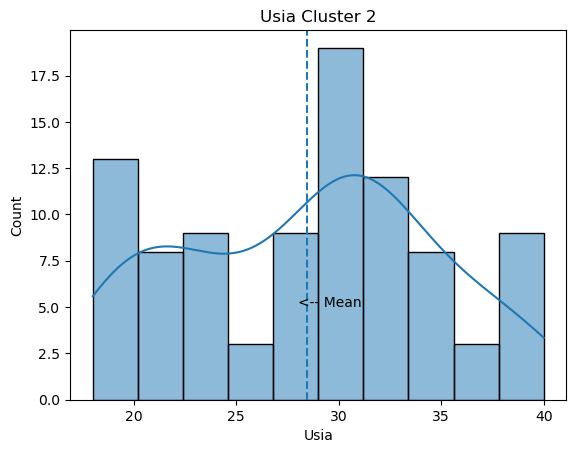

In [1017]:
# plot cluster 2
sns.histplot(cluster2['Usia'], kde=True, bins=10)
plt.title('Usia Cluster 2')
plt.axvline(cluster2['Usia'].mean(), ls='--')
plt.text(28, 5, '<-- Mean')

Text(39, 5, '<-- Mean')

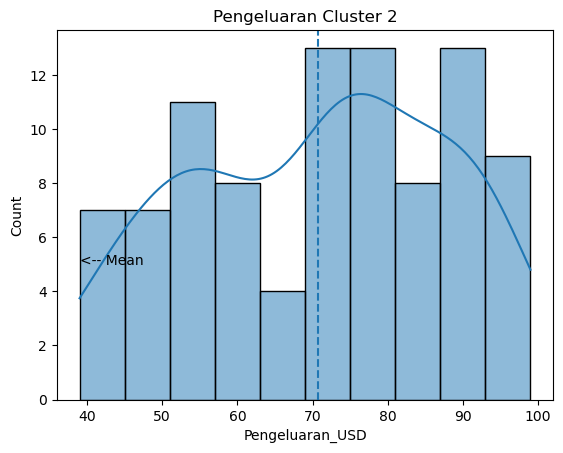

In [1018]:
# plot pengeluaran cluster 2
sns.histplot(cluster2['Pengeluaran_USD'], kde=True, bins=10)
plt.title('Pengeluaran Cluster 2')
plt.axvline(cluster2['Pengeluaran_USD'].mean(), ls='--')
plt.text(39, 5, '<-- Mean')

**Pola & Tren :**
- ada penurunan jelas dalam pengeluaran seiring bertambahnya usia.
- konsentrasi pengeluaran tinggi dominan diusia muda
- semakin bertambah usia, pola pengeluaran akan cenderung lebih tersebar dan menurun

**Karakteristik Pengunjung :**
- pengunjung usia muda (20-40) cenderung memiliki pola pengeluaran yang tinggi.
- pengunjung usia menengah-tua (40-70) cenderung lebih berhemat.
- ada variasi individual yang signifikan dalam setiap kelompok usia.

**Implikasi Bisni :**
- Target market utama bisa difokuskan pada kelompok usia muda
- strategi marketing berbeda mungkin diperlukan untuk tiap cluster
- perlu pertimbangan khusus untuk meningkatkan pengeluaran di kelompok usia menengah-tua

**Kesimpulan :**
- usia memiliki pengaruh signifikan terhadap pola pengeluaran pengunjung mall.
- segmentasi pengunjung terlihat jelas berdasarkan usia dan tingkat pengeluaran
- strategi bisnis perlu disesuaikan dengan karakteristik masing-masing cluster